# Fashion MNIST

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

<img src="data/dataset-cover.png">

### Get the data from kaggle
 https://www.kaggle.com/zalando-research/fashionmnist

### Parameters

In [1]:
train_file_path = 'data/fashion-mnist_train.csv'
number_of_epochs = 15
validation_split = 0.3
batch_size = 64

In [2]:
# Import neccessary Libararies
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input
from keras.utils import plot_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Using TensorFlow backend.


### Load Training Data

In [3]:
data = pd.read_csv(train_file_path)

### Data Exploration

In [4]:
print("Number of Training Examples = %s " % data.shape[0])
print("Number of columns for each Training Example = %s" % data.shape[1])

Number of Training Examples = 60000 
Number of columns for each Training Example = 785


In [5]:
data.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

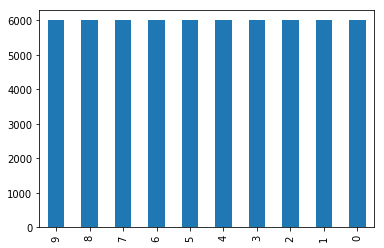

In [7]:
pd.value_counts(data['label']).plot.bar()

### Prepare training data

In [8]:
data = data.values
X_train = data[:, 1:].reshape(-1, 28, 28, 1) / 255.0
Y_train = data[:, 0].astype(np.int32)

In [9]:
number_of_classes = len(set(Y_train))
print ("Number of Classes = %s" %number_of_classes)

Number of Classes = 10


In [10]:
print(Y_train)

[2 9 6 ... 8 8 7]


In [11]:
# Convert int values for classes to one-hot encoded values
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### Build Model

<b>Convolution Layer </b> https://keras.io/layers/convolutional/

<b>Pooling Layer </b> http://faroit.com/keras-docs/1.2.2/layers/pooling/

<b>Flattening </b> https://keras.io/layers/core/

<b>list of losses: </b>  https://keras.io/losses/
 
<b>list of optimizers: </b>  https://keras.io/optimizers/
 
<b>list of metrics: </b>  https://keras.io/metrics/

In [12]:
#create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(number_of_classes, activation='softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

### Train model on training set

In [14]:
r = model.fit(X_train, Y_train, validation_split=validation_split, epochs=number_of_epochs, batch_size=batch_size)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 5s 109us/step - loss: 0.7165 - acc: 0.7327 - val_loss: 0.4668 - val_acc: 0.8261
Epoch 2/15
42000/42000 [==============================] - 3s 68us/step - loss: 0.4667 - acc: 0.8280 - val_loss: 0.3744 - val_acc: 0.8604
Epoch 3/15
42000/42000 [==============================] - 3s 71us/step - loss: 0.3985 - acc: 0.8534 - val_loss: 0.3269 - val_acc: 0.8825
Epoch 4/15
42000/42000 [==============================] - 3s 65us/step - loss: 0.3631 - acc: 0.8667 - val_loss: 0.3111 - val_acc: 0.8893
Epoch 5/15
42000/42000 [==============================] - 3s 66us/step - loss: 0.3442 - acc: 0.8722 - val_loss: 0.3026 - val_acc: 0.8899
Epoch 6/15
42000/42000 [==============================] - 3s 70us/step - loss: 0.3270 - acc: 0.8784 - val_loss: 0.2837 - val_acc: 0.8947
Epoch 7/15
42000/42000 [==============================] - 3s 72us/step - loss: 0.3128 - acc: 0.8836 - val_loss: 0.2725 - val_ac

In [15]:
print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


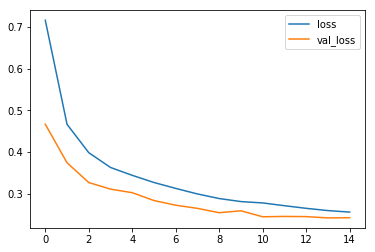

In [16]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

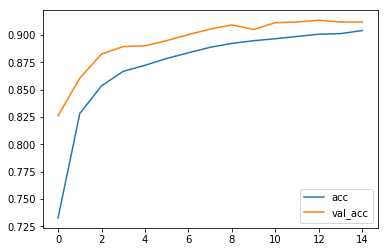

In [17]:
# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
